# **SS2: PREPARA PARA APLICAR**


Hola Cómo están

## AIRBNB DATASET - México

In [ ]:
# 
# 
# 

In [ ]:
# Paquetería 
import pandas as pd

In [ ]:
# Conexión con google drive - No olvidar entrar a la liga con la llave
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Módulo 6 Ingeniería de caracteres/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Módulo 6 Ingeniería de caracteres


In [ ]:
# Lectura de Datos pd.read_csv("airbnb_mexico_dataset.csv")
datos = pd.read_csv("/content/airbnb_mexico_dataset.csv")
datos.head()

,airbnb_id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,...,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month
0,35797,153786,28/06/2010,NaN,NaN,f,NaN,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,...,7,364,0,NaN,NaN,NaN,NaN,NaN,f,NaN
1,44616,196253,09/08/2010,within a few hours,1.0,f,Condesa,9,"['email', 'phone', 'reviews', 'offline_governm...",t,...,365,360,49,91.0,9.0,10.0,10.0,10.0,f,0.43
2,56074,265650,19/10/2010,within an hour,1.0,t,San Rafael,2,"['email', 'phone', 'facebook', 'reviews']",t,...,250,261,57,98.0,10.0,10.0,10.0,10.0,t,0.46
3,67703,334451,04/01/2011,within a day,1.0,f,Hipódromo,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,...,30,333,39,98.0,10.0,10.0,10.0,10.0,f,0.34
4,70644,212109,24/08/2010,within an hour,1.0,t,Coyoacán,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,...,180,183,103,98.0,10.0,10.0,10.0,10.0,f,0.92


In [ ]:
# Dimensión de datos
datos.shape

(15756, 31)

### Tema 1: Valores perdidos

In [ ]:
# is.na(nombre dataframe).sum() - Detectar cuántos valores perdidios tiene cada columna
# Reflexión sobre el número de variables y valores faltantes

pd.isna(datos).sum()

airbnb_id                         0
host_id                           0
host_since                        0
host_response_time                0
host_response_rate                0
host_is_superhost                 0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   18
bedrooms                        614
beds                            225
price                             0
minimum_nights                    0
maximum_nights                    0
availability_365                  0
number_of_reviews                 0
review_scores_rating           3921
review_scores_cleanliness      3963
review_scores_checkin          3968
review_scores_communication    3966
review_scores_location      

In [ ]:
# Eliminar la columna de host_neighborhood #imputar valores sería muy complicado, eliminarlos me quita el 50% de mis datos aprox. 
datos = datos.drop(['host_neighbourhood'], axis = 1)
datos.shape



(15756, 30)

In [ ]:
#Host response time - imputar con moda (Sugerencia)

#datos['host_response_time'].unique()

#datos['host_response_time'].value_counts().idxmax()


datos['host_response_time'].fillna(datos['host_response_time'].value_counts().idxmax(), inplace=True)

NameError: ignored

In [ ]:
# Host response rate - imputar con mediana # Percentiles # 50% 

datos['host_response_rate'].describe()

datos['host_response_rate'].fillna(datos['host_response_rate'].median(), inplace=True)


In [ ]:
# Bathroom text
#¿Que pueden observar? 
#¿Valdría la pena dividirlo en 2 columnas? #baño compartido

datos['bathrooms_text'].unique()


array(['1 bath', '5.5 baths', '1.5 baths', '1 private bath', '4.5 baths',
       '1 shared bath', '0 baths', '2 baths', '1.5 shared baths',
       '6 baths', nan, '3.5 baths', '2.5 baths', '3 baths',
       '2 shared baths', '4 baths', '5 baths', '8 shared baths',
       '3 shared baths', '3.5 shared baths', '4 shared baths', '10 baths',
       '50 baths', '0 shared baths', '16 baths', '5 shared baths',
       '10.5 baths', '7 baths', '2.5 shared baths', '20 baths',
       '4.5 shared baths', 'Half-bath', '10 shared baths',
       '6.5 shared baths', '5.5 shared baths', 'Shared half-bath',
       '8.5 baths', '7.5 baths', '6.5 baths', '14 baths',
       '15 shared baths', 'Private half-bath', '9.5 baths', '11 baths',
       '9 shared baths', '8 baths', '6 shared baths', '7.5 shared baths',
       '13 baths'], dtype=object)

In [ ]:
datos['bathrooms_text'].replace({"Shared half-bath":"0.5 shared", "Private half-bath":"0.5 baths", "Half-bath":"0.5"}, inplace=True) #sustituye valor completo de celdas

In [ ]:
bathrooms = datos['bathrooms_text'].____________(" ", n = 1, expand = True) 
bathrooms
#bathrooms.columns = ['bathrooms', 'bathrooms_type']
#bathrooms

AttributeError: ignored

In [ ]:
bathrooms['bathrooms']= pd.to_numeric(bathrooms['bathrooms'])

NameError: ignored

In [ ]:
bathrooms['bathrooms'].describe()

NameError: ignored

In [ ]:
bathrooms['bathrooms_type'].unique()

In [ ]:
bathrooms['bathrooms_type'].replace({"bath":"no information", "baths":"no information", "private bath":"private", "shared bath":"shared", "shared baths":"shared"}, inplace=True)

In [ ]:
datos = datos.______(bathrooms)
datos.head()

In [ ]:
datos.isnull().sum()

In [ ]:
datos = datos.drop(['bathrooms_text'], axis = 1) #información redundante, hay que imputar valores en las últimas columnas 

In [ ]:
#Mediana bathrooms
datos['bathrooms'].________(datos['bathrooms'].median(), inplace=True)

#moda bathrooms_type
datos['bathrooms_type']._______(datos['bathrooms_type'].value_counts().idxmax(), inplace=True) 
datos['bathrooms_type'].value_counts()

# reflexión, ¿qué opinan sobre esta última variable? 

KeyError: ignored

In [ ]:
# BEDROOMS

#datos['bedrooms'].describe() #Percentil 75
datos['bedrooms'].fillna(datos['bedrooms'].quantile(0.75), inplace=True)

In [ ]:
# Beds
#datos['beds'].describe() #mediana
datos['beds'].fillna(datos['beds'].median(), inplace=True)

In [ ]:
# Scores
#datos['review_scores_rating'].describe()
datos['review_scores_rating'].fillna(datos['review_scores_rating'].mean(), inplace=True)

In [ ]:
datos['review_scores_cleanliness'].fillna(datos['review_scores_cleanliness'].mean(), inplace=True)
datos['review_scores_communication'].fillna(datos['review_scores_communication'].mean(), inplace=True)
datos['review_scores_location'].fillna(datos['review_scores_location'].mean(), inplace=True)

In [ ]:
datos['review_scores_checkin'].fillna(datos['review_scores_checkin'].mean(), inplace=True)

In [ ]:
#datos['reviews_per_month'].describe() #poner 1
datos['reviews_per_month'].fillna(1, inplace = True)

In [ ]:
datos.isnull().sum()

airbnb_id                       0
host_id                         0
host_since                      0
host_response_time              0
host_response_rate              0
host_is_superhost               0
host_total_listings_count       0
host_verifications              0
host_has_profile_pic            0
host_identity_verified          0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms_text                 18
bedrooms                        0
beds                            0
price                           0
minimum_nights                  0
maximum_nights                  0
availability_365                0
number_of_reviews               0
review_scores_rating            0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
instant_bookable                0
reviews_per_mo

## TEMA 2: Transformación de variables

### Valores atípicos

Supongamos que queremos predecir el precio de un Airbnb dadas ciertas caracterícticas. 

In [ ]:
datos.describe()

,airbnb_id,host_id,host_response_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
count,1.575600e+04,1.575600e+04,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000
mean,3.171911e+07,1.252870e+08,0.920772,10.037636,19.398747,-99.168238,3.031861,1.505204,1.808264,1077.727152,4.549315,705.970551,223.462808,26.630363,95.040051,9.582888,9.817357,9.783630,9.816439,1.199582
std,1.269358e+07,1.024673e+08,0.227363,36.065557,0.046379,0.035856,2.151454,1.442928,1.802389,3913.466629,21.793347,757.937001,136.413885,47.799794,7.639069,0.802140,0.637143,0.685574,0.597720,1.319901
min,3.579700e+04,7.365000e+03,0.000000,0.000000,19.167530,-99.340570,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,0.010000
25%,2.198442e+07,3.773596e+07,1.000000,1.000000,19.373890,-99.180563,2.000000,1.000000,1.000000,399.000000,1.000000,90.000000,89.000000,1.000000,95.000000,9.582888,9.817357,9.783630,9.816439,0.360000
50%,3.385813e+07,1.013753e+08,1.000000,2.000000,19.410965,-99.167945,2.000000,1.000000,1.000000,686.500000,2.000000,1125.000000,253.000000,6.000000,95.040051,10.000000,10.000000,10.000000,10.000000,1.000000
75%,4.277296e+07,1.963240e+08,1.000000,6.000000,19.430703,-99.153025,4.000000,2.000000,2.000000,1100.000000,2.000000,1125.000000,362.000000,30.000000,99.000000,10.000000,10.000000,10.000000,10.000000,1.320000
max,4.942614e+07,3.980585e+08,1.000000,389.000000,19.555880,-98.963360,16.000000,50.000000,50.000000,350000.000000,1000.000000,50000.000000,365.000000,558.000000,100.000000,10.000000,10.000000,10.000000,10.000000,27.340000


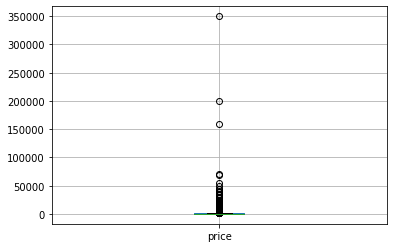

In [ ]:
# Variable Y 
boxplot = datos.boxplot(column=['price'])
boxplot

In [ ]:
#datos[(datos['price'] >1 )]
#datos[(datos['price'] < 10000 )] #sugerencia

datos = datos[(datos['price']>1)]
datos

,airbnb_id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month
0,35797,153786,28/06/2010,within an hour,1.0,f,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,...,7,364,0,95.040051,9.582888,9.817357,9.78363,9.816439,f,1.00
1,44616,196253,09/08/2010,within a few hours,1.0,f,9,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,365,360,49,91.000000,9.000000,10.000000,10.00000,10.000000,f,0.43
2,56074,265650,19/10/2010,within an hour,1.0,t,2,"['email', 'phone', 'facebook', 'reviews']",t,f,...,250,261,57,98.000000,10.000000,10.000000,10.00000,10.000000,t,0.46
3,67703,334451,04/01/2011,within a day,1.0,f,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,30,333,39,98.000000,10.000000,10.000000,10.00000,10.000000,f,0.34
4,70644,212109,24/08/2010,within an hour,1.0,t,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,180,183,103,98.000000,10.000000,10.000000,10.00000,10.000000,f,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,49418556,90103249,15/08/2016,within an hour,1.0,f,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,1125,85,0,95.040051,9.582888,9.817357,9.78363,9.816439,t,1.00
15752,49418668,22758914,20/10/2014,within an hour,1.0,f,150,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,4,300,0,95.040051,9.582888,9.817357,9.78363,9.816439,t,1.00
15753,49420689,311812889,24/11/2019,within an hour,1.0,f,0,"['email', 'phone']",t,f,...,15,365,0,95.040051,9.582888,9.817357,9.78363,9.816439,t,1.00
15754,49422258,397157470,15/04/2021,within an hour,1.0,f,1,['phone'],t,t,...,365,365,0,95.040051,9.582888,9.817357,9.78363,9.816439,f,1.00


In [ ]:
# Proceso estadístico con la desviación estándar

factor = 3 #probar con 2 y 3
upper_lim = datos['price'].mean() + datos['price'].std()*factor
print(upper_lim)
lower_lim = datos['price'].mean() + datos['price'].std()*factor
print(lower_lim)

# Valores que están fuera de estos límites

datos2 = datos[(datos['price'] < upper_lim) & (datos['price'] > lower_lim)]
datos2.shape 

12818.539793746346
12818.539793746346


(0, 30)

(array([1.4116e+04, 1.1950e+03, 2.3100e+02, 9.4000e+01, 3.4000e+01,
        2.7000e+01, 9.0000e+00, 6.0000e+00, 2.0000e+00, 3.0000e+00,
        5.0000e+00, 7.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

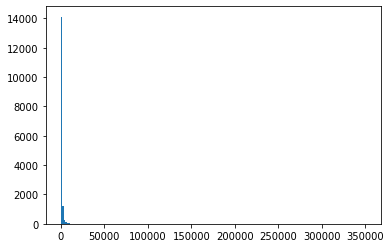

In [ ]:
import matplotlib.pyplot as plt
plt.hist(datos.price, bins = 200)

In [ ]:
# proceso "artesanal" - reflexión

In [ ]:
#percentiles - para fines de la actividad
datos['price'].describe()

count     15755.000000
mean       1077.795557
std        3913.581412
min         145.000000
25%         399.000000
50%         687.000000
75%        1100.000000
max      350000.000000
Name: price, dtype: float64

In [ ]:
upper_lim = datos['price'].quantile(.90)
print(upper_lim)
lower_lim = datos['price'].quantile(.05)
print(lower_lim)

datos = datos[(datos['price'] < upper_lim) & (datos['price'] > lower_lim)]
datos.shape

1900.0
225.0


(13337, 30)

(array([1719., 1292., 1298., 1417.,  929., 1006., 1091.,  584.,  720.,
         712.,  377.,  481.,  313.,  264.,  194.,  310.,  204.,  162.,
         156.,  108.]),
 array([ 226.  ,  309.65,  393.3 ,  476.95,  560.6 ,  644.25,  727.9 ,
         811.55,  895.2 ,  978.85, 1062.5 , 1146.15, 1229.8 , 1313.45,
        1397.1 , 1480.75, 1564.4 , 1648.05, 1731.7 , 1815.35, 1899.  ]),
 <a list of 20 Patch objects>)

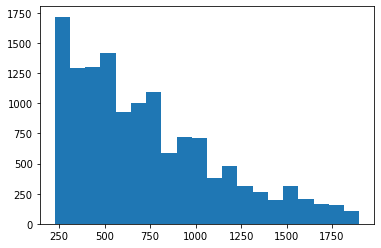

In [ ]:
plt.hist(datos.price, bins = 20)

Tendríamos que contrarestar las demás variables contra la variable Y para ver si hay algún otro valor atípico, (y de preferencia analizarlas individualmente primero)

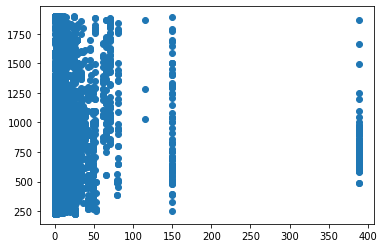

In [ ]:
plt.scatter(x=datos.host_total_listings_count, y=datos.price)
# Parecieran extraños aquellos airbnb que han  registrado a más de 400 personas 

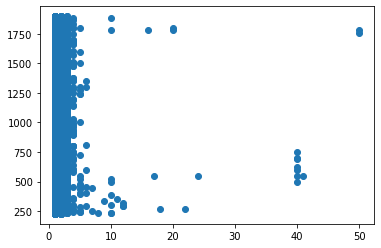

In [ ]:
plt.scatter(x=datos.bedrooms, y=datos.price)
# esquina superior derecha ¿qué hacer con ellos? 

### Transformación de variables

In [ ]:
# VARIABLE Y
## SESGO
datos['price'].skew()
# sesgo a la derecha y no pareciera una distribución normal

0.8837859918455877

(array([711., 429., 814., 680., 377., 685., 533., 283., 754., 460., 236.,
        586., 386., 225., 502., 357., 233., 574., 281., 230., 374., 276.,
        220., 426., 136., 111., 224., 122., 110., 291., 104.,  94., 145.,
         95., 139., 114.,  62.,  73., 218.,  37.,  99.,  90.,  31.,  63.,
         83.,  34.,  63.,  68.,  33.,  66.]),
 array([ 226.  ,  259.46,  292.92,  326.38,  359.84,  393.3 ,  426.76,
         460.22,  493.68,  527.14,  560.6 ,  594.06,  627.52,  660.98,
         694.44,  727.9 ,  761.36,  794.82,  828.28,  861.74,  895.2 ,
         928.66,  962.12,  995.58, 1029.04, 1062.5 , 1095.96, 1129.42,
        1162.88, 1196.34, 1229.8 , 1263.26, 1296.72, 1330.18, 1363.64,
        1397.1 , 1430.56, 1464.02, 1497.48, 1530.94, 1564.4 , 1597.86,
        1631.32, 1664.78, 1698.24, 1731.7 , 1765.16, 1798.62, 1832.08,
        1865.54, 1899.  ]),
 <a list of 50 Patch objects>)

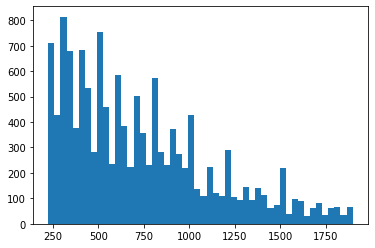

In [ ]:
plt.hist(datos.price, bins = 50)

In [ ]:
import numpy as np

#¿Por qué log? sesgo - rango de valores muy amplio - una cola de la distribución muy notoria, para reducir este sesgo aplicamos esta distribición, nos permite tener nuestros datos en un rango más delimitado
datos['log+1'] = (datos['price']+1).transform(np.log) #+1 porque log(0) no existe
datos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,airbnb_id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month,log+1
2,56074,265650,19/10/2010,within an hour,1.0,t,2,"['email', 'phone', 'facebook', 'reviews']",t,f,...,261,57,98.000000,10.000000,10.000000,10.00000,10.000000,t,0.46,6.204558
3,67703,334451,04/01/2011,within a day,1.0,f,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,333,39,98.000000,10.000000,10.000000,10.00000,10.000000,f,0.34,7.548029
4,70644,212109,24/08/2010,within an hour,1.0,t,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,183,103,98.000000,10.000000,10.000000,10.00000,10.000000,f,0.92,6.995766
6,131610,647454,31/05/2011,within an hour,1.0,f,3,['phone'],t,f,...,0,0,95.040051,9.582888,9.817357,9.78363,9.816439,f,1.00,7.207860
8,171109,816295,13/07/2011,within an hour,1.0,t,2,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,348,72,97.000000,9.000000,10.000000,10.00000,10.000000,f,0.83,5.525453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,49418556,90103249,15/08/2016,within an hour,1.0,f,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,85,0,95.040051,9.582888,9.817357,9.78363,9.816439,t,1.00,6.408529
15752,49418668,22758914,20/10/2014,within an hour,1.0,f,150,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,300,0,95.040051,9.582888,9.817357,9.78363,9.816439,t,1.00,6.949856
15753,49420689,311812889,24/11/2019,within an hour,1.0,f,0,"['email', 'phone']",t,f,...,365,0,95.040051,9.582888,9.817357,9.78363,9.816439,t,1.00,5.786897
15754,49422258,397157470,15/04/2021,within an hour,1.0,f,1,['phone'],t,t,...,365,0,95.040051,9.582888,9.817357,9.78363,9.816439,f,1.00,6.216606


(array([ 923., 1220., 1559., 1601., 1591., 1858., 1818., 1082., 1022.,
         663.]),
 array([5.42495002, 5.63741593, 5.84988185, 6.06234776, 6.27481368,
        6.48727959, 6.69974551, 6.91221142, 7.12467734, 7.33714325,
        7.54960917]),
 <a list of 10 Patch objects>)

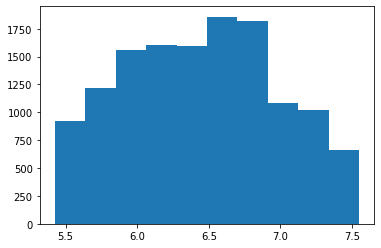

In [ ]:
plt.hist(datos['log+1'], bins = 10)

### Escalamiento y normalización

In [ ]:
datos.describe()

,airbnb_id,host_id,host_response_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,...,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,log+1
count,1.333700e+04,1.333700e+04,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,...,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000
mean,3.166171e+07,1.238934e+08,0.922421,9.400990,19.398742,-99.167877,2.857914,1.422584,1.681113,731.373472,...,708.673615,222.853640,28.203269,95.013511,9.582992,9.818855,9.784901,9.817080,1.240165,6.450933
std,1.273144e+07,1.017621e+08,0.225414,35.891056,0.045238,0.035170,1.796687,1.376770,1.500069,397.330555,...,796.279972,136.083699,49.448564,7.690373,0.804998,0.643089,0.691869,0.600482,1.367422,0.544846
min,5.607400e+04,7.365000e+03,0.000000,0.000000,19.185340,-99.340570,1.000000,1.000000,0.000000,226.000000,...,1.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,0.010000,5.424950
25%,2.183871e+07,3.784751e+07,1.000000,1.000000,19.374010,-99.179760,2.000000,1.000000,1.000000,400.000000,...,90.000000,89.000000,1.000000,95.000000,9.582888,9.817357,9.783630,9.816439,0.380000,5.993961
50%,3.379764e+07,1.002237e+08,1.000000,2.000000,19.410300,-99.167400,2.000000,1.000000,1.000000,649.000000,...,1125.000000,249.000000,7.000000,95.040051,10.000000,10.000000,10.000000,10.000000,1.000000,6.476972
75%,4.278961e+07,1.900227e+08,1.000000,5.000000,19.430390,-99.153060,4.000000,2.000000,2.000000,968.000000,...,1125.000000,362.000000,33.000000,99.000000,10.000000,10.000000,10.000000,10.000000,1.410000,6.876265
max,4.942614e+07,3.980585e+08,1.000000,389.000000,19.555880,-98.977040,16.000000,50.000000,50.000000,1899.000000,...,50000.000000,365.000000,558.000000,100.000000,10.000000,10.000000,10.000000,10.000000,27.340000,7.549609


In [ ]:
datos = datos.drop(['airbnb_id', 'host_id', 'latitude', 'longitude'], axis = 1)

In [ ]:
datos.head(1)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,property_type,room_type,...,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month,log+1
2,19/10/2010,within an hour,1.0,t,2,"['email', 'phone', 'facebook', 'reviews']",t,f,Entire condominium,Entire home/apt,...,261,57,98.0,10.0,10.0,10.0,10.0,t,0.46,6.204558




> Host response rate = 0 - 1


> Host total listings count = 0 - 389


> Accommodates = 1 - 16


> Bedrooms y beds = 1 - 50


> Min & Max nigths = (1 - 1000) (1 - 50000) **Podemos empezar a ver el cambio de escalas**


> Scores: 0 - 100













In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
## La estandarización y la normalización se utilizan para el escalado de características 
## (escalar las características a un rango específico en lugar de estar en un rango grande, lo cual es muy complejo de comprender para el modelo)

### Estandarización: Este concepto se refiere a hacer que la distribución de datos sea normal. Transforma la media de los datos en 0 y su varianza en 1. ##MÁS COMÚN
### Normalización: Este concepto se refiere a transformar los datos en el rango [0, 1]. cada uno de los registros de datos en el conjunto de datos 
### se transformará en el rango entre 0 y 1, de modo que los datos caigan dentro de un rango estrecho que ayuda al modelo a aprender.


# Estandarización

columns = ['price','log+1', 'host_since', 'host_response_time', 'host_is_superhost', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'room_type', 'instant_bookable', 'bathrooms_type']
categoricas = pd.DataFrame(datos, columns=columns) #variables categoricas y variable respuesta (y) 

numericas = datos.drop(['price', 'log+1', 'host_since', 'host_response_time', 'host_is_superhost', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'room_type','instant_bookable', 'bathrooms_type'], axis = 1)
#numericas.columns #['host_response_rate', 'host_total_listings_count', 'accommodates','bedrooms', 'beds', 'minimum_nights', 'maximum_nights','availability_365', 'number_of_reviews', 'review_scores_rating','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','reviews_per_month', 'bathrooms']

from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(numericas)
scaled


KeyError: ignored

In [ ]:
numericas = pd.DataFrame(scaled)
numericas.columns = ['host_response_rate', 'host_total_listings_count', 'accommodates','bedrooms', 'beds', 'minimum_nights', 'maximum_nights','availability_365', 'number_of_reviews', 'review_scores_rating','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','reviews_per_month', 'bathrooms']
numericas

NameError: ignored

In [ ]:
numericas.describe()
#media 0 y desv estandar 1

NameError: ignored

In [ ]:
numericas = numericas.round(2)

# PCA 

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pca_model = 

SyntaxError: ignored

In [ ]:
pca_model.fit(numericas)

NameError: ignored

In [ ]:
pca_model.components_

In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes. #vector de loadings, cargas
pd.DataFrame(
    data    = pca_model.components_,
    columns = numericas.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16']
)

In [ ]:
# Porcentaje de varianza explicada acumulada ¿Con cuántos componentes se quedarían? 
# ==============================================================================
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum) #propuestas distintas - 85% 95%  - poco poder computacional 75%

NameError: ignored

In [ ]:
proyecciones = np.dot(pca_model.components_, scale(numericas).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'])
proyecciones = proyecciones.transpose().set_index(numericas.index)
proyecciones

In [ ]:
conjunto_1 = proyecciones[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']]
conjunto_1.head()

In [ ]:
conjunto_1

### Split variables

Ya lo hicimos con los baños, valdría la pena intentar con "host verification" y construir nuevas variables

por el momento, vamos a eliminar esa columna

In [ ]:
categoricas = categoricas.drop(['host_verifications', 'property_type'], axis = 1)

### Distribución de variables - Binarias y One hot Encoding

In [ ]:
categoricas

,price,log+1,host_since,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type,instant_bookable,bathrooms_type
2,494,6.204558,19/10/2010,within an hour,t,t,f,Entire home/apt,t,NaN
3,1896,7.548029,04/01/2011,within a day,f,t,t,Entire home/apt,f,NaN
4,1091,6.995766,24/08/2010,within an hour,t,t,t,Entire home/apt,f,NaN
6,1349,7.207860,31/05/2011,within an hour,f,t,f,Private room,f,NaN
8,250,5.525453,13/07/2011,within an hour,t,t,t,Private room,f,NaN
...,...,...,...,...,...,...,...,...,...,...
15751,606,6.408529,15/08/2016,within an hour,f,t,t,Entire home/apt,t,NaN
15752,1042,6.949856,20/10/2014,within an hour,f,t,t,Entire home/apt,t,NaN
15753,325,5.786897,24/11/2019,within an hour,f,t,f,Private room,t,NaN
15754,500,6.216606,15/04/2021,within an hour,f,t,t,Entire home/apt,f,NaN


In [ ]:
categoricas2 = categoricas.iloc[:,3:10]
#categoricas2

categoricas2 = pd.get_dummies(categoricas2, drop_first=True)2

In [ ]:
categoricas2

In [ ]:
categoricas2 = categoricas2.reset_index()
# cuando eliminamos valores en valores atípicos nuestros índices se movieron - cuidado

In [ ]:
categoricas2 

,index,bathrooms_type,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_t
0,2,NaN,0,0,1,1,1,0,0,0,0,1
1,3,NaN,1,0,0,0,1,1,0,0,0,0
2,4,NaN,0,0,1,1,1,1,0,0,0,0
3,6,NaN,0,0,1,0,1,0,0,1,0,0
4,8,NaN,0,0,1,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13332,15751,NaN,0,0,1,0,1,1,0,0,0,1
13333,15752,NaN,0,0,1,0,1,1,0,0,0,1
13334,15753,NaN,0,0,1,0,1,0,0,1,0,1
13335,15754,NaN,0,0,1,0,1,1,0,0,0,0


In [ ]:
todas_las_x = categoricas2.join(conjunto_1)

NameError: ignored

In [ ]:
todas_las_x

Al aplicar One hot encoding se genera una variable dummie por cada nivel de cada variable categórica, faltaría eliminar 1 variable dummie para que no se tenga información redundante en el conjunto de datos. 

In [ ]:
y_s = categoricas[['price', 'log+1']]

NameError: ignored

In [ ]:
y_s

In [ ]:
y_s = y_s.reset_index()
y_s = y_s[['price', 'log+1']]

In [ ]:
datos1 = todas_las_x.join(y_s)

In [ ]:
datos1 = datos1.drop(['index'], axis=1)

Tras aplicar los comentarios adicionales que se presentaron este documento (eliminar una columa de las que se generaron por cada variable categórica), añadir nuevas categorias (feature split), etc... 

Nuestro conjunto de datos estaría listo para pasar a la siguiente etapa dentro del proceso de un proecto de ciencia de datos: Modelado (:


Listo (:

In [ ]:
# FALTARÍA APLICAR FA